# Исследование продаж компьтерных игр

**Краткое описание:** Заказчик - интернет-магазин "Стримчик", который продает компьютерные игры. Необходимо проанализировать данные из открытых источников для планирования продуктовой линиии и рекламных компаний.
    
**Цель проекта:** Выявить определяющие успешность игр закономерности.
    
<i>Примечание:
ESRB (Entertaiment Software Rating Board) - это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контерт и присваивает ему подходящую возврастную категорию ("для взрослых", "для детей младшего возраста", "для подростков").</i>

**План работы:**
1. выгрузить данные, осуществить первичный обзор;
2. переименовать колонки, привести наименования к "змеиному регистру";
2. определить, есть ли пропуски в данных; заполнить пропуски или удалить строки с пропусками;
3. измененить тип данных;
4. проверить данные на наличие явных и неявных дубликатов, исправить данные;
5. рассчитать новые значения, добавить их в новые колонки;
6. проанализировать данные в соответствии с поставленной целью проекта;
7. составить портрет пользователя каждого региона;
8. выдвинуть и проверить гипотезы;
9. сформировать вывод, полученный из результатов анализа.

## Обзор данных

In [ ]:
# загружаем библиотеки

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy import stats as st

In [ ]:
# загружаем датасет

pth_1 = r'C:\Users\WANTNEON\Desktop\Проекты практикум\Исследование продаж компьтерных игр'
pth_2 = 'games.csv'

if os.path.exists(pth_1):
    df = pd.read_csv(pth_1)
    print('Данные загружены в Jupiter Notebook')
elif os.path.exists(pth_2):
    df = pd.read_csv(pth_2)
    print('Данные загружены в Colaboratory')
else:
    print('Что-то пошло не так. Данные не загружены')

Данные загружены в Colaboratory


In [ ]:
# создаем функцию для первичного обзора данных

def first_check(dataset):

    print('Первые 10 строк таблицы \n')
    display(dataset.head(10))

    print()
    print('Последние 10 строк таблицы \n')
    display(dataset.tail(10))

    print()
    print('Информация о таблице \n')   
    print(dataset.info())

    print()
    print('Характеристики чисел в таблице \n')  
    display(dataset.describe())

    print()
    print('Наименование колонок \n')  
    print(dataset.columns)

In [ ]:
# применяем функцию для первичного обзора

first_check(df)

Первые 10 строк таблицы 



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



Последние 10 строк таблицы 



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN



Информация о таблице 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Характеристики чисел в таблице 



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



Наименование колонок 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


**Проблемы, выявленные после первичного обзора данных:**
1. В колонках `'Name'`, `'Year_of_Release'`, `'Genre'`, `'Critic_Score'`, `'User_Score'` и `'Rating'` есть пропуски.
2. В колонке с годом реализации данные имеют тип `float`, а должны иметь тип `int`. Данные в колонке с оценками пользователей имеют тип `object`, а должны иметь тип `float`, поэтому нет описания этой колонки при вызове метода `describe()`.
3. В колонках о продажах очень много нулей.
4. Все колонки необходимо привести к "змеиному_регистру".

## Предобработка данных

### Переименование колонок

Приведем все колонки к нижнему регистру. Это упростит дальнейшую работу.

In [ ]:
df.columns = df.columns.str.lower()
df.columns # проверяем, все ли получилось

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Заполнение и удаление пропусков


Поскольку данные получены из открытых источников, то причин возникновения прпоусков несколько:
* отсутствие данных как таковых (не велся подсчет продаж, не присваивался возврастной рейтинг, игры не оценивались);
* ошибки при заполнении данных;
* ошибки при выгрузке данных.

#### Колонка `'name'`

Выведим строки с пропусками в колонке `'name'`.

In [ ]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки, в которых почти нет полезной информации. Два пропуска в колонке `'genre'` в этих же строках. Удалим их.

In [ ]:
df = df.dropna(subset=['name'])
df['name'].isna().sum() # проверим, все ли пропуски удалены

0

#### Колонка `'year_of_release'`

Выведим строки с пропусками в колонке `'year_of_release'`.

In [ ]:
df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
print(
    'Процент строк с пропусками в колонке year_of_release: {:.1%}'
    .format(df['year_of_release'].isna().sum() / len(df))
    )

Процент строк с пропусками в колонке year_of_release: 1.6%


1.6% строк с пропусками - небольшой процент, который можно удалить.

In [ ]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'].isna().sum() # проверим, все ли пропуски удалены

0

#### Колонки `'critic_score'` и `'user_score'`

Посчитаем количество припусков в колонках `'critic_score'`, `'user_score'`, `'rating'`.

In [ ]:
print(
    'Количество строк с пропусками в колонке critic_score: {}'
    .format(df['critic_score'].isna().sum())
    )

print(
    'Количество строк с пропусками в колонке user_score: {}'
    .format(df['user_score'].isna().sum())
    )

print(
    'Количество строк с пропусками в колонке rating: {}'
    .format(df['rating'].isna().sum())
    )

Количество строк с пропусками в колонке critic_score: 8461
Количество строк с пропусками в колонке user_score: 6605
Количество строк с пропусками в колонке rating: 6676


Можно было бы предположить, что отсутствие оценок критиков зависит от пропусков в других показателях, но это не так, потому что количество пропусков в трех последних колонках разное.

Проигнорируем пропуски. На корреляцию они не повлияют, а при построении гипотез мы их уберем.

Проверим, есть ли в колонках нечисловые значения.

In [ ]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Оценки критиков отобращены о шкале от `0 до 100`, а оценки пользователей - `от 0 до 10`.

В колонке `'user_score'` есть нечисловое значение `tbd`, что обозначает `to be determind`, или `будет определено`. Посмотрим, сколько таких строк и их процент.

In [ ]:
print(
    'Количество строк со значением tbd в колонке user_score: {}'
    .format(len(df.query('user_score == "tbd"')))
    )

print(
    'Процент строк со значением tbd в колонке user_score: {:.1%}'
    .format(len(df.query('user_score == "tbd"')) / len(df))
    )

Количество строк со значением tbd в колонке user_score: 2376
Процент строк со значением tbd в колонке user_score: 14.4%


Строк довольно много, и они содержат другую полезную для исследования информацию. Возможно, пропуски связаны с 2016 годом, как последним годом в данных, и поэтому оценки еще не определены. Проверим это.

In [ ]:
df.loc[df['user_score'] == 'tbd', 'year_of_release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

Предположение не подтвердилось. Заменим `tbd` на `Nan`, потому что для нас это те же пропуски. Эти пропуски мы так же оставим.

In [ ]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

# проверим, все ли нужные нам значения поменялись

len(df.query('user_score == "tbd"')) 

0

#### Колонка `'rating'`

Посмотрим процент строк с пропусками в колонке `'rating'`.

In [ ]:
print(
    'Процент строк с пропусками в колонке rating: {:.1%}'
    .format(df['rating'].isna().sum() / len(df))
    )

Процент строк с пропусками в колонке rating: 40.6%


`40.6%` - это очень большой процент. Пропуски удалять не стоит, будем их игнорировать.

Посмотрим уникальные значения колонки.

In [ ]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Расшифровка:
* "E" ("Everyone") — "Для всех", ранее — "K-A" ("Kids to Adults") — "От детей до взрослых". Поэтому трем играм с рейтингом "K-A" присвоим рейтинг "E";

* "T" ("Teen") — "Подросткам": игра подходит для лиц от 13 лет;

* "M" ("Mature") — "Для взрослых": материалы игры не подходят для подростков младше 17 лет;

* "E10+" ("Everyone 10 and older") — "Для всех от 10 лет и старше";

* "EC" ("Early childhood") — "Для детей младшего возраста": игра подходит для детей от 3 лет;

* "AO" ("Adults Only 18+") — "Только для взрослых": содержание игры только для взрослых старше 18 лет;

* "RP" ("Rating Pending") — "Рейтинг ожидается": продукт был отправлен в ESRB и ожидает присвоения рейтинга. Значение в этой строке заменим на `NaN`.

In [ ]:
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].replace('RP', np.NaN)
df['rating'].value_counts() # проверим, все ли получилось

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

### Изменение типов данных

In [ ]:
df.info() # посмотрим на информацию о таблице после заполнения пропусков

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Заменим тип данных колонки `'year_of_release'` на тип `'int'`, чтобы годы отображались как целые числа, а также тип данных колонки `'user_score'` на тип `'float'`, чтобы они стали числовыми и их можно было коррелировать.

In [ ]:
df = df.astype({'year_of_release' : 'int', 'user_score' : 'float'})
df.info() # проверим, поменялся ли тип данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Поиск неявных и явных дубликатов

In [ ]:
df['platform'].unique() # посмотрим, есть ли неявные дубликаты в колонке с платформами

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df.duplicated().sum() # проверим, есть ли полные дубликаты в таблице

0

In [ ]:
df = df.reset_index(drop=True) # сбросим индексы
df.tail() # посмотрим, все ли получилось

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16443,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


### Добавление колонки с суммарными продажами в регионах

Добавим колонку с суммой всех проданных копий по регионом для каждой игры.

In [ ]:
df['common_sales'] = (
    df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .sum(axis=1)
)

df.head() # посмотрим, как теперь выглядит датасет

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

### Определение актуального периода

Посмотрим, сколько игр выпускалось каждый год.


In [ ]:
# формируем датасет

games_per_year = (
    df.groupby('year_of_release')
    .agg({'name':'count'})
    .reset_index()
    .rename(columns={'name':'games_count'})
)

In [ ]:
# строим график

fig = px.bar(
    games_per_year,
    x=games_per_year['year_of_release'],
    y=games_per_year['games_count'],
    text_auto = True,
    title='Количество выпускаемых игр по годам',
    labels={'games_count':'Количество игр', 'year_of_release':'Год выпуска'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textfont_size=10, textposition='outside')

fig.show() 

В 1980-е годы количество выпускаемых игр было примерно одинаково: 14-20 игр в год (кроме 1981 и 1982 годов - 46 и 36 игр соответственно). С 1991 года наблюдается постепенное увеличение количества выпускаемых игр, и в 2008-2009 годы это количество достигает своего пика: 1427 и 1426 игр соответственно. Начиная с 2010 года количество игр с каждым годом уменьшается и в 2016 году составляет 502 игры.

Посокольку цель данного проекта - выявить определяющие успешность игр закономерности на будущий 2017 год, то данные за все годы нам не понадобятся. В течение 36 лет менялись платформы, для которых выпускаются игры, их жанры и предпочтения людей.

Прежде, чем определить период, который будет полезен для анализа, посмотрим, как менялись продажи по платформам. 

Сначала посмотрим на самые популярные платформы за все время.

In [ ]:
platforms_sum = (
    df.groupby('platform')
    .agg({'common_sales' : 'sum'})
    .sort_values(by='common_sales', ascending=False)
    .head(15)
)

platforms_sum

,common_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Cоздадим датасет с 11 самыми популярными платформами по продажам игр (11, т.к. интересно посмотреть на продажи игр для PC; предполагаю, что данная платформа востребована долгое время).

In [ ]:
df_top_platforms = df.query('platform in @platforms_sum.head(11).index').copy()

Создадим сводную таблицу, в которой будет определено количество проданных копий игр для каждой популярной платформы по годам выпуска. Построим по ней график.

In [ ]:
platforms_sum_per_year = df_top_platforms.pivot_table(
    index='platform',
    columns='year_of_release',
    values='common_sales',
    aggfunc='sum'
    )

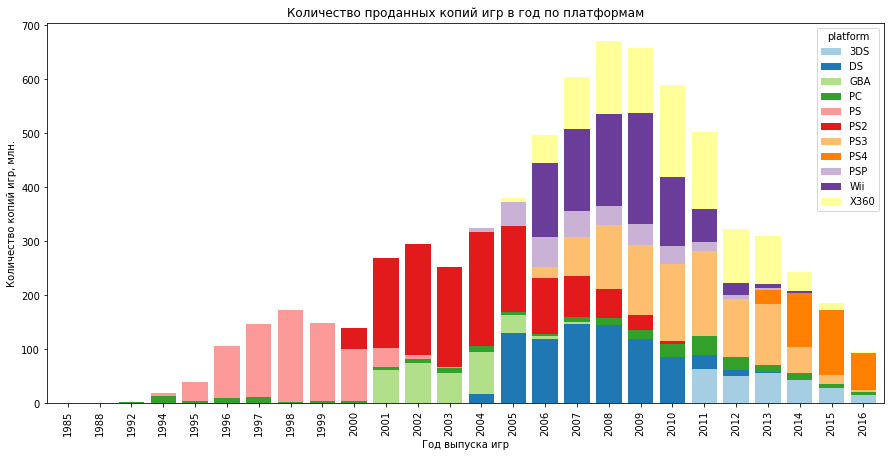

In [ ]:
ax = platforms_sum_per_year.T.plot(
    kind='bar', figsize=(15, 7), stacked=True, width=0.8,
    color=sns.color_palette('Paired')
    )

ylab = ax.set_ylabel('Количество копий игр, млн.')

xlab = ax.set_xlabel('Год выпуска игр')
title = ax.set_title('Количество проданных копий игр в год по платформам')

По графику видно, что каждая платформа востребована в среднем 10 лет. Особенно это заметно, когда платформа предыдущего поколения сменяется этой же платформой нового поколения: PS была популярна с 1994 по 2003 годы, PS2 - с 2000 по 2010 годы, PS3 - с 2006 по 2016 годы, PS4 - с 2013 года.

Исключение из правила, как и предполагалось, - платформа PC. Игры для персональных компьютеров начали выпускаться в 1992 году и выпускаются до сих пор.

Поскольку у платформ век короткий, возьмем данные за последние 3 года, или 2014-2016 годы.

Создадим новый датасет.

In [ ]:
df_new = df.loc[df['year_of_release'] > 2013].copy().reset_index(drop=True)

### Определение потенциально выгодных платформ

Из обновленного датасета создадим сводную таблицу, в которой будет определено количество проданных копий игр для каждой популярной платформы по годам выпуска. Построим график по этой таблице.

In [ ]:
platforms_new = (
    df_new.groupby(['year_of_release', 'platform'])
    .agg({'common_sales':'sum'})
    .reset_index()
    .sort_values(by='common_sales')
)

In [ ]:
fig = px.histogram(platforms_new,
                   x='year_of_release',
                   y='common_sales',
                   color='platform',
                   barmode='group',
                   text_auto = True,
                   color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    title='Количество проданных копий игр по платформам за 2014-2016 годы',
    xaxis_title='',
    yaxis_title='Количество проданных копий',
    legend_title_text='Платформа')

fig.update_traces(textfont_size=10, textposition='outside')
fig.show()

Сгруппируем данные по-другому, чтобы отобразить процент рынка, занимаемый платформой в период с 2014 по 2016 годы.

In [ ]:
platforms_new_percent = df_new.pivot_table(
    index='platform',
    columns='year_of_release',
    values='common_sales',
    aggfunc='sum'
    )

In [ ]:
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=('2014', '2015', '2016'),
                    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(
        values=platforms_new_percent[2014],
        labels=platforms_new_percent.index),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        values=platforms_new_percent[2015],
        labels=platforms_new_percent.index),
    row=1, col=2
)

fig.add_trace(
    go.Pie(
        values=platforms_new_percent[2016],
        labels=platforms_new_percent.index),
    row=1, col=3
)

fig.update_layout(
    title_text='Процент проданных копий игр по платформам за 2014-2016 годы',
    legend_title_text='Платформа'
    )

fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))

fig.show()

Поскольку было определено, что продажи игр в общем падают, потому что игр выпускается в два раза меньше по сравнению с 2006 - 2011 годами, лучше всего судить о прибыльности игр для конкретной платформы по доли продаж за год. Если доля платформы увеличивается, то в ближайшие годы она будет приносить больше прибыли, если уменьшается - то, вероятнее всего, ее жизненный цикл в 10 лет заканчивается.

Разберем каждую платформу (все пики продаж и долей на рынке рассматриваются в период с 2014 по 2016 годы, т.е. реальный пик продаж для платформы мог быть и раньше, но мы его рассматривать не будем).

* **3DS.** Платформа появилась в 2011 году. Пик продаж в `43.76 млн. копий` был в 2014 году. Пик доли на рынке за последние три года был в 2014 году - `13.2%`. Средняя доля продаж за последние 3 года составляет `11.8%`. Данная платформа будет востребована еще ближайшие `4-5 лет`, но доля на рынке и продажи игр для нее будут постепенно снижаться.

* **PC.**	Платформа - исключение. Напомню, что игры для этой платформы выпускаются с 1992 года. Средняя доля продаж за последние 3 года стабильна и составляет `3.73%`. Эта платформа будет востребована до тех пор, пока люди не перестанут пользоваться персональными компьютерами. Когда это произойдет, никто не знает. Возможно, только Илон Маск или Билл Гейтс =)

* **PS3.** Платформа появилась в 2006 году. Пик продаж в `47.76 млн. копий` был в 2014 году. Доля продаж с 2014 года уменьшается ежегодно в 2 раза и в 2016 году составила `2.8%`. Данная платформа не будет востребована в 2017 году, т.к. ее жизненный цикл в 10 лет закончился.

* **PS4.** Платформа появилась в 2013 году. Пик продаж в `118.9 млн. копий` был в 2015 году. Пик доли на рынке в `53.3%` был в 2016 году (лучший результат за анализируемый период для всех платформ). Данная платформа будет востребована еще ближайшие `6-7 лет`. Она еще не достигла середины своего жизненного цикла, но рост доли рынка замедлился на 24% (в 2015 году доля на рынке выросла на 44%, или 14.2 процентных пункта, а в 2016 году - на 20%, или 8.9 процентных пункта). Поэтому в 2017 году доля на рынке будет на уровне предыдущего года.

* **PSP.** Платформа появилась в 2004 году. Доля продаж в 2014 году составляла `меньше 0.1%`, а в 2016 году продаж не было вовсе. Данная платформа не будет востребована в 2017 году, т.к. ее жизненный цикл в 10 лет закончился.

* **PSV.** Платформа появилась в 2011 году. Пик продаж в `11.9 млн. копий` был в 2014 году. Средняя доля продаж за последние 3 года составляет `3%`. Данная платформа будет востребована еще ближайшие `4-5 лет`, но доля на рынке и продажи игр для нее будут постепенно снижаться.

* **Wii.** Платформа появилась в 2006 году. Доля продаж в последние три года уменьшается и в 2016 году составила `0.18%`, когда было продано `180 тыс. копий`. Данная платформа не будет востребована в 2017 году, т.к. ее жизненный цикл в 10 лет закончился.

* **WiiU.** Платформа появилась в 2012 году. Пик продаж в `22.03 млн. копий` был в 2014 году. Доля продаж за период 2014-2015 годов была стабильна и в среднем составляла `6.35%`. Однако в 2016 доля на рынке резко упала до `3.5%`, или на 45%. Данная платформа будет востребована еще ближайшие `4-5 лет`, но доля на рынке и продажи игр для нее будут продолжать снижаться.

* **X360.** Платформа появилась в 2005 году. Пик продаж в `34.74 млн. копий` был в 2014 году. Доля продаж в 2015 году уменьшилась более чем в 2 раза по сравнению с 2014 годом, а в 2016 году она уменьшилась почти в 4 раза в сравнении с 2015 годом и составила `1.2%`. Данная платформа не будет востребована в 2017 году, т.к. ее жизненный цикл в 10 лет закончился.

* **XOne.** Платформа появилась в 2013 году. Пик продаж в `60.14 млн. копий` был в 2015 году. Данная платформа будет востребована еще ближайшие `6-7 лет`. Она еще не достигла середины своего жизненного цикла, но доля рынка в 2016 году по сравнению с 2015 годом уменьшилась на 10%, или 2.3 процентных пункта, и составила `20.1%`.В 2017 году доля на рынке будет на уровне предыдущего года.

**Вывод**

В 2017 году самыми востребованными играми будут те, которые выпущены для платформ, появшихся на рынке не ранее 2013 года, а именно `PS4` и `XOne`. 

В 2017 году играми средней востребованности будут те, которые выпущены для платформ, появшихся на рынке не ранее 2011 года, а именно `3DS`, `PSV` и `WiiU`. Также сюда можно включить `PC`, т.к. данная платформа является исключением из основной тенденции: она занимает небольшой, но стабильный процент на рынке. 

В 2017 году не будут востребованы игры, которые выпущены для платформ, появшихся на рынке до 2011 года, а именно `PS3`, `PSP`, `Wii` и `X360`.

### Анализ колонки `'common_sales'`

Построим график, на котором будут видны выбросы значений колонки `'common_sales'` для каждой платформы, вызовим метод `describe()`.

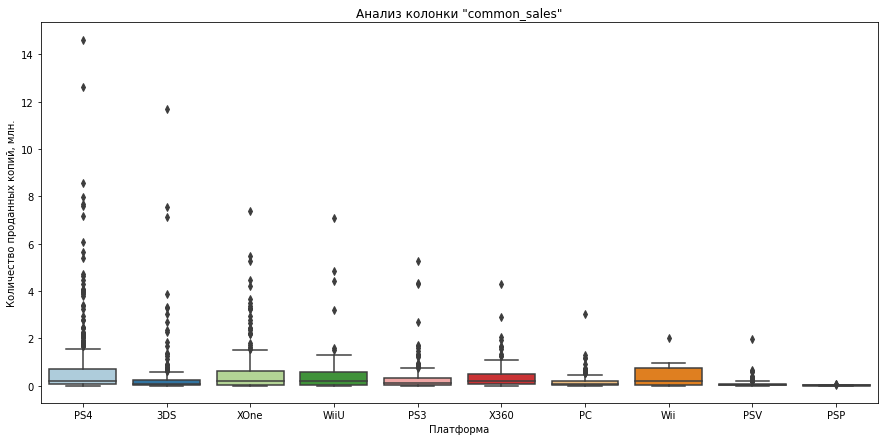

In [ ]:
plt.figure(figsize=(15, 7))

sns.boxplot(data=df_new, x='platform', y='common_sales',
            palette=sns.color_palette('Paired'))

plt.title('Анализ колонки "common_sales"')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн.')

plt.show()

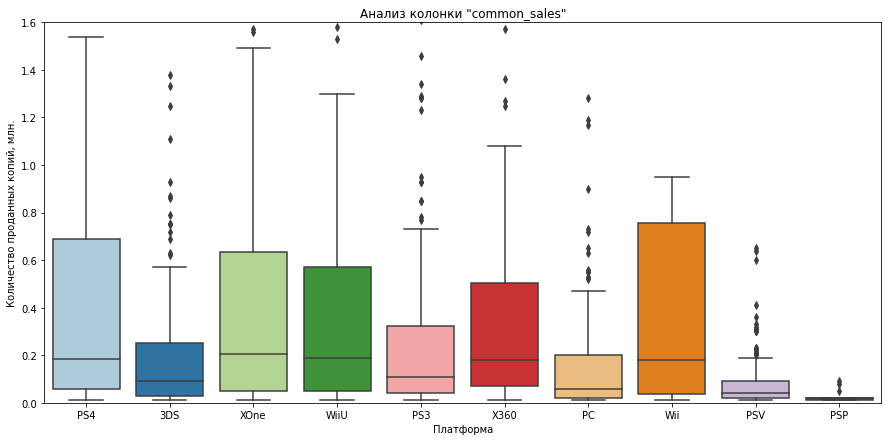

In [ ]:
plt.figure(figsize=(15, 7))

sns.boxplot(data=df_new, x='platform', y='common_sales',
             palette=sns.color_palette('Paired'))
# ограничим значения 'common_sales' до 20, чтобы укрупнить график и лучше \
# отобразить "ящики"
plt.ylim(0, 1.6) 

plt.title('Анализ колонки "common_sales"')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн.')

plt.show()

In [ ]:
df_new['common_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: common_sales, dtype: float64

75% игр в 2014-2016 годы имели продажи до 35 тыс. копий. Максимальное значение, от которого начинаются выбросы, у `PS4`, `XOne` - почти 1.6 млн. копий. Выведим строки со значениями `'common_sales'` больше 2.

In [ ]:
df_new.query('common_sales > 2').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [ ]:
df.query('common_sales > 2').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Если посмотреть рейтинг самых продаваемых игр за всю историю 2016 года, то там можно увидеть `Wii Sports` с 82 млн. копий, `Mario Kart Wii` с 37 млн., `Wii Sports Resort` с 33 млн. и т.д. Получается, что колонки с продажами содержат продажи не в год выпуска игры, а за все время до 2016 года.

Посмотрим, есть ли игры, которые были выпущены в 2016 году и проданы более, чем 2 млн. копий, в год выпуска.

In [ ]:
df_new.loc[(df_new['common_sales'] > 2) & (df_new['year_of_release'] == 2016)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
10,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
15,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
22,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
29,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
37,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80
60,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65
64,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M,2.42
69,Far Cry: Primal,PS4,2016,Action,0.60,1.25,0.06,0.35,76.0,6.3,M,2.26
70,Battlefield 1,XOne,2016,Shooter,1.28,0.77,0.00,0.20,87.0,8.2,M,2.25


Таких игр всего 12. Невооруженным взглядом можно увидеть, что в этом списке преобладают шуттеры для PS4 и XOne. Но самая продаваемая игра - FIFA 17, и на обеих платформах она продана в 10.25 млн. копий.

Посчитаем процент игр, имеющих миллионные продажи.

In [ ]:
print(
    'Процент игр, имеющих миллионные продажи: {:.2%}'
    .format(len(df_new.query('common_sales >= 1')) / len(df_new))
)

Процент игр, имеющих миллионные продажи: 10.12%


**Вывод**

Ранее проведенное иследование платформ подтвердилось: наибольшее количество проданных копий игр характерно для платформ `PS4` и `XOne`, которые определены как самые перспективные в 2017 году.

Стоит отметить, что всего `10%` игр были проданы `более 1 млн.` раз, а `75%` игр продаются `до 35 тыс.` раз.

### Анализ влияния оценок игр на их продажи

Проанализируем как вляют отзывы критиков и игроков на продажи игр для платформ, которые были определены как восстребованные в 2017 году: `PS4`, `XOne`, `3DS`, `PSV`, `WiiU` и `PC`. Создадим функцию, которая сформирует датасет с общими продажами, оценками критиков и покупателей для платформы, посчитает корреляцию и построит корреляционную матрицу. Применим функцию.

In [ ]:
def correlation(platform):

    data = df_new.loc[df_new['platform'] == platform,
                      ['critic_score', 'user_score', 'common_sales']]

    print('Таблица корреляции платформы', platform)
    print()
    plt.figure(figsize=(5, 5))
    sns.heatmap(round(data.corr(), 2), annot=True, square=True)
    plt.show()
    print()
    print('Корреляционная матрица платформы', platform)
    print()
    sns.pairplot(data)
    plt.show()    

#### PS4

Таблица корреляции платформы PS4



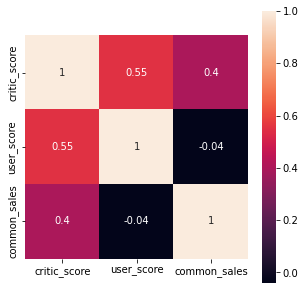


Корреляционная матрица платформы PS4



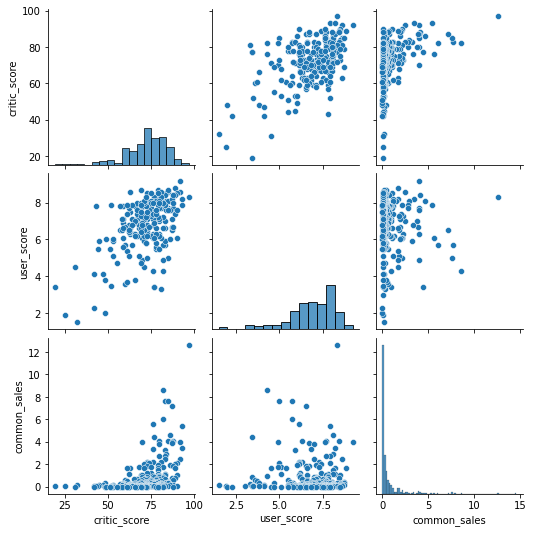

In [ ]:
correlation('PS4')

**Вывод**

Количество проданных копий не зависит от оценок пользователей.

Между оценками критиков и  продажами есть слабая прямая связь. На графике эта связь видна, когда оценка критиков больше 70 баллов из 100.

Есть слабая прямая связь оценок пользователей и оценок критиков. На графике эта связь более заметна, когда оценка критиков достигает 80 и более.

#### XOne

Таблица корреляции платформы XOne



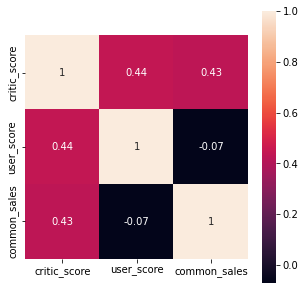


Корреляционная матрица платформы XOne



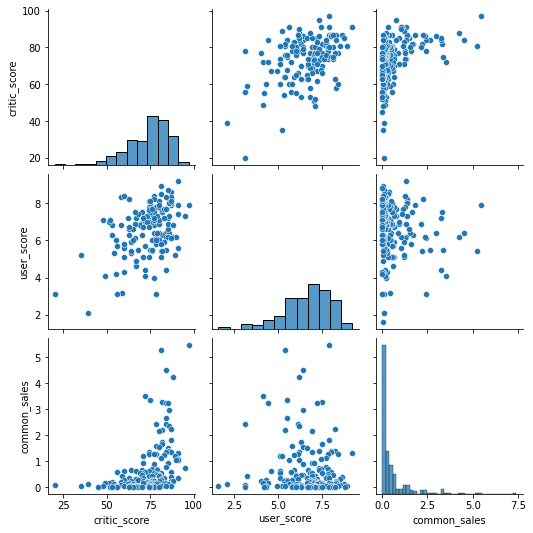

In [ ]:
correlation('XOne')

**Вывод**

Количество проданных копий не зависит от оценок пользователей.

Между оценками критиков и  продажами есть слабая прямая связь. На графике эта связь видна, когда оценка критиков больше 75 баллов из 100.

Есть слабая прямая связь оценок пользователей и оценок критиков. На графике эта связь почти не заметна.

#### 3DS

Таблица корреляции платформы 3DS



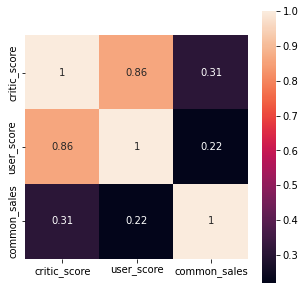


Корреляционная матрица платформы 3DS



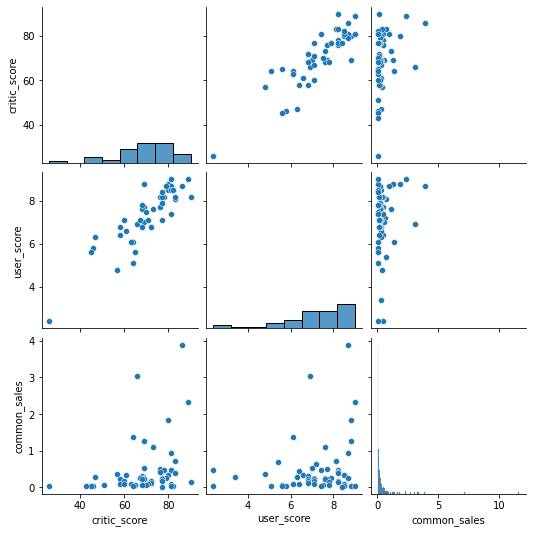

In [ ]:
correlation('3DS')

**Вывод**

Количество проданных копий почти не зависит от оценок пользователей. Значение корреляции немного больше, чем у предыдущих платформ.

Между оценками критиков и  продажами есть прямая связь, но очень слабая.

Есть сильная прямая связь оценок пользователей и оценок критиков. График отлично отображает эту связь.

#### PSV

Таблица корреляции платформы PSV



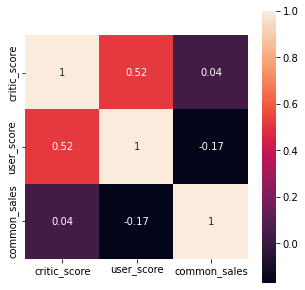


Корреляционная матрица платформы PSV



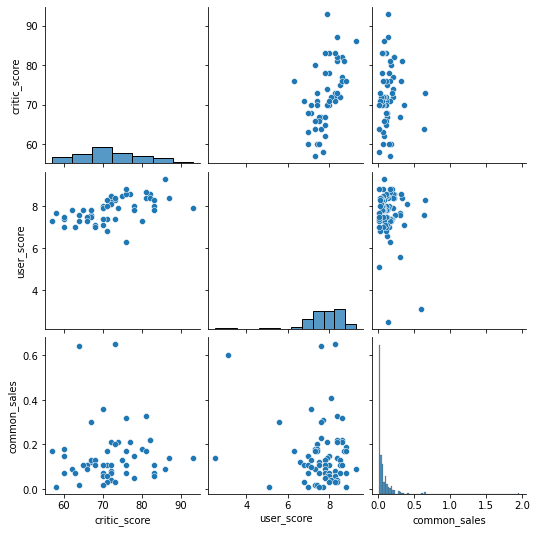

In [ ]:
correlation('PSV')

**Вывод**

Количество проданных копий не зависит от оценок критиков и пользователей.

Есть слабая прямая связь оценок пользователей и оценок критиков.

#### WiiU

Таблица корреляции платформы WiiU



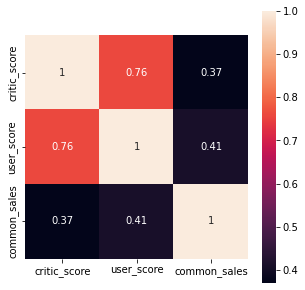


Корреляционная матрица платформы WiiU



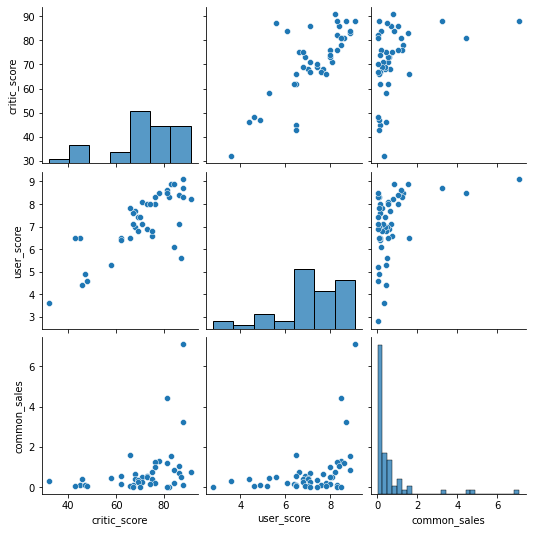

In [ ]:
correlation('WiiU')

**Вывод**

Есть слабая прямая связь между продажами и оценками критиков и покупателей. На графике связь видна, когда оценка критиков и пользователей больше 75 и 8 баллов соответственно.

Есть сильная прямая связь оценок пользователей и оценок критиков. На графике эта связь хорошо отображена.

#### PC

Таблица корреляции платформы PC



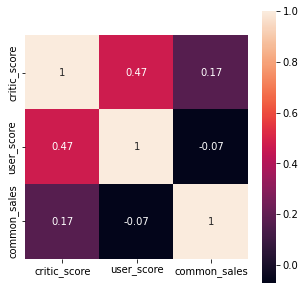


Корреляционная матрица платформы PC



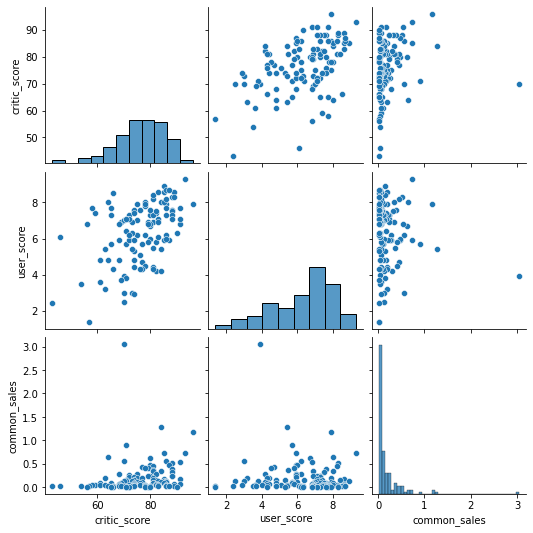

In [ ]:
correlation('PC')

**Вывод**

Количество проданных копий не зависит от оценок пользователей.

Между оценками критиков и продажами есть прямая связь, но слабая.

Есть средняя прямая связь оценок пользователей и оценок критиков. На графике она не очень хорошо, но заметна.

#### Общий вывод по анализу влияния оценок игр на их продажи


* Чем востребованнее платформа, тем сильнее связь между оценками критиков и количеством проданных копий. Так, самая сильная зависимость у `PS4` и `XOne`, у `WiiU` и `3DS` зависимость немного слабее, а у `PSV` и `PC` она почти отсутствует. В то же время ни у одной платформы нет сильной прямой связи, связь только слабая, и значение корреляции не больше `0.43`.

* У всех платформ, кроме `WiiU`, отсутствует зависимость оценок пользователей от продаж. При этом у платформы `WiiU` данная зависимость слабая, значение корреляции - `0.4`.

* У всех платформ наблюдается средняя или сильная прямая зависимость оценки пользователей от оценки критиков. При этом, у самых востребованных платформ (`PS4`, `XOne`), а также `PC` эта зависимость немного слабее, чем у остальных.
Среднее значение корреляции для первой группы составляет `0.48`, а для второй - `0.71`.

Обычно, критики выставляют свой рейтинг до того, как игра вышла в продажу или в самом начале продаж. Учитывая, что продажи больше зависят от оценок критиков, чем пользователей, то еще до поступления игры в продажу можно предсказать, будет ли она популярна, по рейтингу критиков.

### Анализ влияния жанра игры на ее продажи

Создадим сводную таблицу, в которой для каждого жанра посчитаем:
* количество выпущенных игр;
* общее количество проданных копий игр;
* мединное значение количество проданных копий игр (среднее не берем, поскольку есть игры, которые были проданы миллионным тиражами; они будут сильно искажать картину).

Данные берем за период 2006-2016 годов.

Построим столбчатые диаграммы по полученной сводной таблице.

In [ ]:
df_genre = (
    df_new.groupby('genre')
    .agg({'name' : 'count', 'common_sales' : ['sum', 'median']})
)

df_genre.columns = df_genre.columns.droplevel(0)

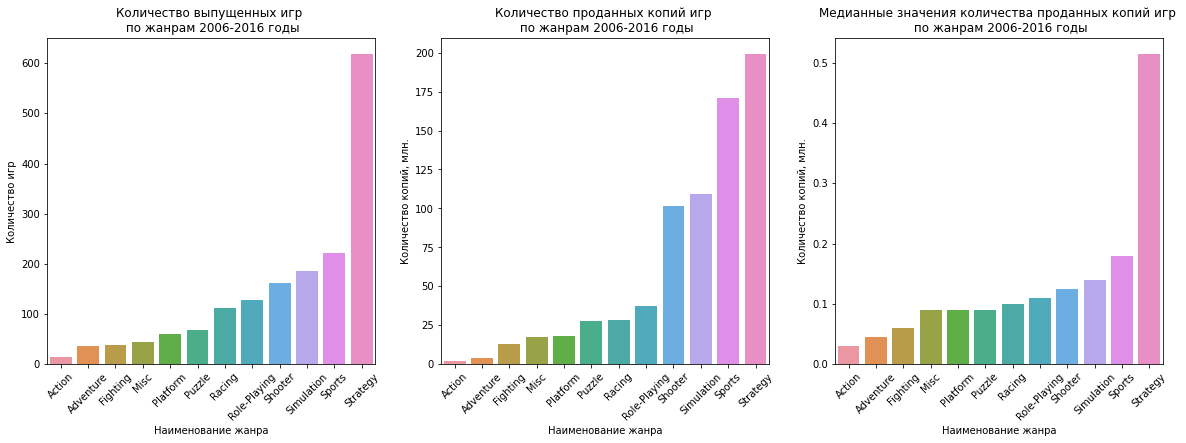

In [ ]:
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
sns.barplot(data=df_genre.sort_values(by='count'), x=df_genre.index, y='count')
plt.title('Количество выпущенных игр \n по жанрам 2006-2016 годы')
plt.xlabel('Наименование жанра')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
    
ax2 = plt.subplot(1, 3, 2)
sns.barplot(data=df_genre.sort_values(by='sum'), x=df_genre.index, y='sum')
plt.title('Количество проданных копий игр \n по жанрам 2006-2016 годы')
plt.xlabel('Наименование жанра')
plt.ylabel('Количество копий, млн.')
plt.xticks(rotation=45)

ax3 = plt.subplot(1, 3, 3)
sns.barplot(
    data=df_genre.sort_values(by='median'), x=df_genre.index, y='median'
    )
plt.title(
    'Медианные значения количества проданных копий игр \n по жанрам 2006-2016 годы'
    )
plt.xlabel('Наименование жанра')
plt.ylabel('Количество копий, млн.')
plt.xticks(rotation=45)

plt.show() 

**Вывод**

* Наибольшее количество игр было выпущено в жанре `Action` - `619` игр за 3 года. Далее - игры в жанрах `Role-playing` и `Advanture` - `221` и `185` игр соответственно. Наименьшее количество игр имюет жанры `Puzzle`, `Strategy` и `Platform`,  - `14`, `37` и `38` игр соответственно.

* Наибольшее количество игр было продано в жанре `Action` - `199,36 млн. копий` игр за 3 года. Игры в жанрах `Shooter` и `Sports` были проданы в `170.94 млн. копий` и `109.48 млн. копий` соответственно. Наименьшее количество игр имеют жанры `Simulation`, `Strategy`, `Puzzle` - `13.13 млн. копий`, `3.96 млн. копий`, `2.21 млн. копий` игр соответственно.

* Наибольшее медианное значение количества проданных копий у игр жанров `Shooter`, `Sports` и `Platform` - каждая игра распродается в `515 тыс.`, `180 тыс.` и `140 тыс.` копий соответственно. Наименьшее медианное значение у жанров `Strategy`, `Puzzle` и `Adventure` - `60 тыс.`, `45 тыс.` и `30 тыс.` копий соответственно.

Самым прибыльным жанром можно было бы назвать `Action`, поскольку игр в этом жанре выпускается много и много продается, но, исследуя медианные значения, можно увидеть, что далеко не каждая игра `Action` продается большим количеством копий. Следуя данной логике, самые прибыльные жанры - `Shooter` и `Sports`. Они не входят в тройку по количеству выпускаемых игр, но входят в тройку по количеству проданных копий, поскольку имеет самое высокое медианное значение: игры продаются большими тиражами.

Интересно было отметить, что игр жанра `Platform` выпускается мало, но продаются они большими тиражами. Если игра выходит в этом жанре, скорее всего, она будет прибыльной.

Худшие показатели у жанров `Puzzle` и `Strategy`, т.к. их выпускается мало и они продаются малым количеством копий.

### Анализ данных по регионам

В колонке `'rating'` много пропусков. Заполним пропуски занчением `RP` - "Rating Pending", или рейтинг ожидается.

In [ ]:
df_new['rating'] = df_new['rating'].fillna('RP')

Определим для каждого региона популярные платформы, жанры и рейтинг игр в зависимости от количества проданных копий. Построим графики и сравним полученные результаты с помощью функции.

In [ ]:
def region(col):

# формируем сводную таблицу с количеством проданных копий игр по платформам
# для региона

    df_platform = df_new.pivot_table(
        index='platform',
        values=col,
        aggfunc='sum'
        ).sort_values(by=col, ascending=False)

# формируем сводную таблицу с количеством проданных копий игр по жанрам
# для региона

    df_genre = df_new.pivot_table(
        index='genre',
        values=col,
        aggfunc='sum'
        ).sort_values(by=col, ascending=False)

# формируем сводную таблицу с количеством проданных копий игр по рейтингу
# для региона

    df_rating = df_new.pivot_table(
        index='rating',
        values=col,
        aggfunc='sum'
        ).sort_values(by=col, ascending=False)

    plt.figure(figsize=(20, 6))

# создаем столбчатую диаграмму с количеством проданных копий игр по платформам

    ax1 = plt.subplot(1, 2, 1)
    sns.barplot(data=df_platform, x=df_platform.index, y=col)
    plt.title('Количество проданных копий игр по платформам')
    plt.xlabel('Наименование платформы')
    plt.ylabel('Количество копий, млн.')

# создаем столбчатую диаграмму с количеством проданных копий игр по жанрам

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    sns.barplot(data=df_genre, x=df_genre.index, y=col)
    plt.title('Количество проданных копий игр по жанрам')
    plt.xlabel('Наименование жанра')
    plt.ylabel('Количество копий, млн.')
    plt.xticks(rotation=45)

    plt.show()

# создаем круговую диаграмму с долей проданных копий игр по рейтингу

    df_rating.plot(y=col, kind='pie', autopct='%.0f%%', figsize=(5, 5))
    plt.title('Количество проданных копий игр по рейтингу')
    plt.ylabel('Количество копий, %')

    plt.show()

#### Северная Америка

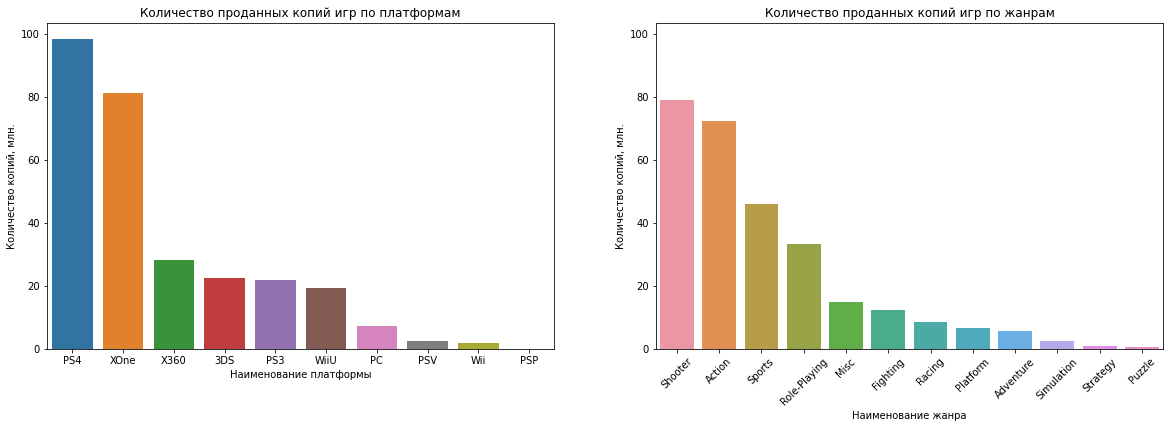

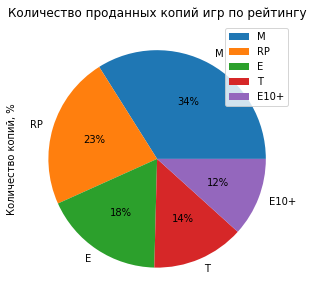

In [ ]:
region('na_sales')

**Вывод**

Самые популярные платформы в Северной Америке за 2014-2016 годы:
1. `PS4`;
2. `XOne`;
3. `X360`;
4. `3DS`;
5. `PS3`.

Самые популярные жанры в Северной Америке за 2014-2016 годы:
1. `Shooter`;
2. `Action`;
3. `Sports`;
4. `Role-Playing`;
5. `Misc`.

В 2014-2016 годах в Северной Америке больше всего продано игр с рейтингом `для взрослых`, `рейтинг ожидается` и `для всех`.



#### Европа

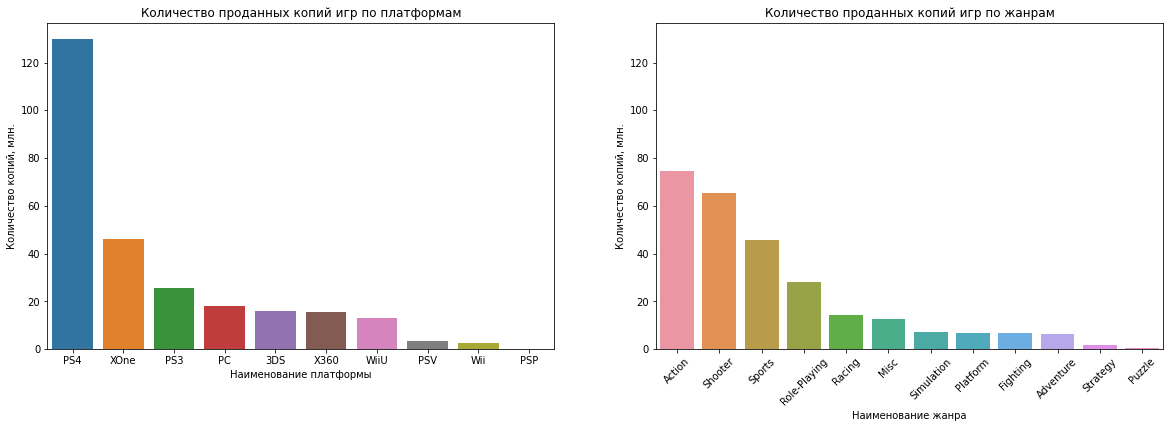

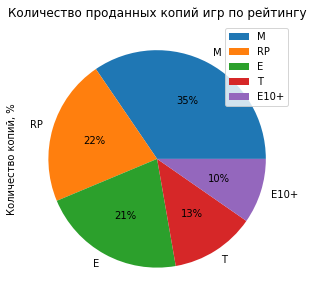

In [ ]:
region('eu_sales')

**Вывод**

Самые популярные платформы в Европе за 2014-2016 годы:
1. `PS4`;
2. `XOne`;
3. `PS3`;
4. `PC`;
5. `3DS`.

Самые популярные жанры в Европе за 2014-2016 годы:
1. `Action`;
2. `Shooter`;
3. `Sports`;
4. `Racing`;
5. `Role-Playing`.

В 2014-2016 годах в Европе больше всего продано игр с рейтингом `для взрослых`, `рейтинг ожидается` и `для всех`.



#### Япония

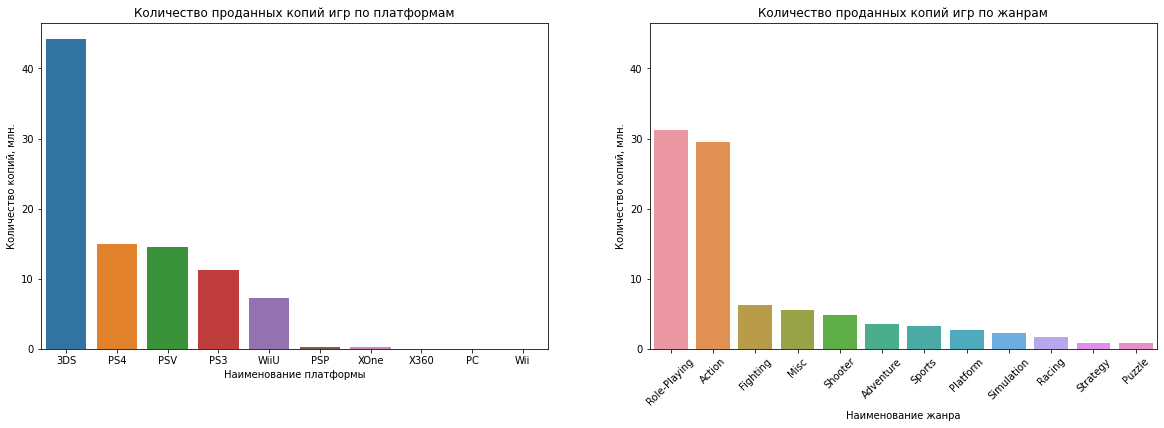

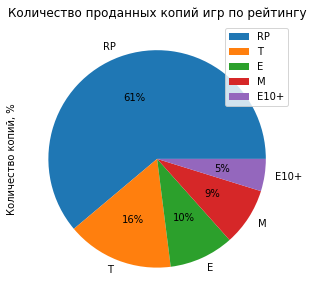

In [ ]:
region('jp_sales')

**Вывод**

Самые популярные платформы в Японии за 2014-2016 годы:
1. `3DS`;
2. `PS4`;
3. `PSV`;
4. `PS3`;
5. `WiiU`.

Самые популярные жанры в Японии за 2014-2016 годы:
1. `Role-Playing`
2. `Action`;
3. `Fighting`;
4. `Misc`;
5. `Shooter`.

В 2014-2016 годах в Японии больше всего продано игр с рейтингом `рейтинг ожидается`, `для подростков от 13 лет` и `для всех`.



#### Общий вывод по анализу данных по регионам

В Северной Америке и в Европе ситуация схожая. В пятерку самых популярных платформ входят `PS4`, `XOne`, `PS3` и `3DS` в разных комбинациях. В Северной Америке все еще популярна платформа `X360`, а в Европе - `PC`.

То же самое и с жанрами игр. В пятерку популярных в обеих регионах входят `Action`, `Sports`, `Shooter`, `Role-Playing` в разных комбинациях. В Европе также популярен жанр `Racing`, а в Северной Америке - `Misc`.

Рейтинги `для взрослых`, `рейтинг ожидается` и `для всех` в Северной Америке и в Европе распределены примерно одинаково.

Япония отличается от этих регионов. В пятерку самых популярных платформ входят: `PSV`, `WiiU`, а также `PS4`, `PS3` и `3DS`, которые входят в десятку платформ в Европе и в Северной Америке.

Самый популярный жанр игр в Японии - `Role-Playing`, который на четвертом месте в Северной Америке и на пятом в Европе. `Action`, `Misc` и `Shooter` в Японии тоже популярны. Жанр `Fighting` более популярен в Японии, чем в других регионах.

В Японии 64% игр не имеют определенного рейтинга в отличие от Европы и Северной Америки, где такие игры занимают 38% рынка. Также в Японии более востребованы игры для подростков. Игры с рейтингом `для подростков от 13 лет` занимают `17%` рынка Японии и занимают второе место в рейтинге. В Северной Америке и Европе такие игры занимают последнее место. Также в Японии популярны игры с рейтингом `для всех`, как и в других регионах.



## Проверка гипотез

Прежде, чем проработать гипотезы, необходимо удалить строки с пропусками. Гипотезы будут связаны с пользовательскими рейтингами игр. Удалим строки с пропусками в этой колонке и сформируем новый датасет.


In [ ]:
df_for_hyp = df_new.dropna(subset=['user_score'])

df_for_hyp.info() # проверим, не осталось ли пропусков в нужных колонках

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1 to 1682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             888 non-null    object 
 1   platform         888 non-null    object 
 2   year_of_release  888 non-null    int64  
 3   genre            888 non-null    object 
 4   na_sales         888 non-null    float64
 5   eu_sales         888 non-null    float64
 6   jp_sales         888 non-null    float64
 7   other_sales      888 non-null    float64
 8   critic_score     704 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           888 non-null    object 
 11  common_sales     888 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 90.2+ KB


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC равны.

**Альтернативная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC не равны.

Для начала сформируем данные для обеих платформ.

In [ ]:
hyp_xone = df_for_hyp.loc[df_for_hyp['platform'] == 'XOne', 'user_score']
hyp_pc = df_for_hyp.loc[df_for_hyp['platform'] == 'PC', 'user_score']

Посчитаем дисперсии совокупностей.

In [ ]:
np.var(hyp_xone)

1.8795460055096425

In [ ]:
np.var(hyp_pc)

2.8773743617307175

Дисперсии сильно различаются, поэтому добавим соответствующий параметр к методу `scipy.stats.ttest_ind()`. Пороговое значение p-value определим как `5%` (оно будет использоваться и при дальнейших расчетах).

In [ ]:
border = 0.05

results_platform = st.ttest_ind(hyp_xone, hyp_pc, equal_var = False)

if results_platform.pvalue < border:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

print('p-значение: ', results_platform.pvalue)

Не получилось отвергнуть нулевую гипотезу
p-значение:  0.11601398086668827


Посмотрим, как это выглядит на цифрах: определим срение значения рейтинга пользователй `XOne` и `PC`.

In [ ]:
hyp_xone.mean()

6.594545454545456

In [ ]:
hyp_pc.mean()

6.298360655737705

**Вывод**

Тест не смог отвергнуть нулевую гипотезу, которая гласит, что средние пользовательские рейтинги платформ Xbox One и PC равны.

Рассчитав средние значения рейтинга для каждой платформы, оказалось, что средний рейтинг пользователей платформы `PC` меньше среднего рейтинга пользователей платформы `XOne` на `4.5%`. Значения очень близки друг к другу.

### Средние пользовательские рейтинги жанров Action и Sports разные

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action и Sports равны.

**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action и Sports не равны.

Для начала сформируем данные для обоих жанров.

In [ ]:
hyp_action = df_for_hyp.loc[df_for_hyp['genre'] == 'Action', 'user_score']
hyp_sports = df_for_hyp.loc[df_for_hyp['genre'] == 'Sports', 'user_score']

Посчитаем дисперсии совокупностей.

In [ ]:
np.var(hyp_action)

1.89208448117539

In [ ]:
np.var(hyp_sports)

3.4198375596751185

Дисперсии сильно различаются, поэтому добавим соответствующий параметр к методу `scipy.stats.ttest_ind()`. Пороговое значение p-value остается`5%`.

In [ ]:
results_genre = st.ttest_ind(hyp_action, hyp_sports, equal_var = False)

if results_genre.pvalue < border:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

print('p-значение: ', results_genre.pvalue)

Отвергаем нулевую гипотезу
p-значение:  1.1825550382644557e-14


Посмотрим, как это выглядит на цифрах: определим срение значения рейтинга пользователй жанра `Action` и `Sports`.

In [ ]:
hyp_action.mean()

6.760606060606061

In [ ]:
hyp_sports.mean()

5.2251968503937

**Вывод**

Тест отверг нулевую гипотезу, значит средние пользовательские рейтинги жанров Action и Sports разные.

Определив средние значения рейтинга для каждого жанра, оказалось, что средний рейтинг пользователей жанра `Action` больше среднего рейтинга пользователей жанра `Sports` на `21%`. Значения явно не равны.

## Общий вывод

В 2017 году самыми востребованными играми будут те, которые выпущены для платформ, появшихся на рынке не ранее 2013 года, а именно `PS4` и `XOne`.

Играми средней востребованности будут те, которые выпущены для платформ, появшихся на рынке не ранее 2011 года, а именно `3DS`, `PSV` и `WiiU`. Также сюда можно включить `PC`, т.к. данная платформа является исключением из основной тенденции: она занимает небольшой, но стабильный процент на рынке. 

В 2017 году не будут востребованы игры, которые выпущены для платформ, появшихся на рынке до 2011 года, а именно `PS3`, `PSP`, `Wii` и `X360`.

---

Чем востребованнее платформа, тем сильнее связь между оценками критиков и количеством проданных копий. Так, самая сильная зависимость у `PS4` и `XOne`. В то же время связь слабая, и значение корреляции не больше `0.42`.

У всех платформ, кроме `WiiU`, отсутствует зависимость оценок пользователей от продаж. При этом у платформы `WiiU` данная зависимость слабая, значение корреляции - `0.4`.

У всех платформ наблюдается средняя или сильная прямая зависимость оценки пользователей от оценки критиков. При этом, у самых востребованных платформ (`PS4`, `XOne`), а также `PC` эта зависимость немного слабее, чем у остальных.
Среднее значение корреляции для первой группы составляет `0.48`, а для второй - `0.71`.

Обычно, критики выставляют свой рейтинг до того, как игра вышла в продажу или в самом начале продаж. Учитывая, что продажи больше зависят от оценок критиков, чем пользователей, то еще до поступления игры в продажу можно предсказать, будет ли она популярна, по рейтингу критиков.

---

Самые прибыльные жанры - `Shooter` и `Sports`. Они не входят в тройку по количеству выпускаемых игр, но входят в тройку по количеству проданных копий, поскольку имеют самое высокое медианное значение: игры продаются большими тиражами.

Игр жанра `Platform` выпускается мало, но продаются они большими тиражами. Если игра выходит в этом жанре, скорее всего, она будет прибыльной.

Худшие показатели у жанров `Puzzle` и `Strategy`, т.к. их выпускается мало и они продаются малым количеством копий.

---

В Северной Америке и в Европе ситуация схожая. В пятерку самых популярных платформ входят `PS4`, `XOne`, `PS3` и `3DS` в разных комбинациях. В Северной Америке все еще популярна платформа `X360`, а в Европе - `PC`.

То же самое и с жанрами игр. В пятерку популярных в обеих регионах входят `Action`, `Sports`, `Shooter`, `Role-Playing` в разных комбинациях. В Европе также популярен жанр `Racing`, а в Северной Америке - `Misc`.

Рейтинги `для взрослых`, `рейтинг ожидается` и `для всех` в Северной Америке и в Европе распределены примерно одинаково.

Япония отличается от этих регионов. В пятерку самых популярных платформ входят: `PSV`, `WiiU`, а также `PS4`, `PS3` и `3DS`, которые входят в десятку платформ в Европе и в Северной Америке.

Самый популярный жанр игр в Японии - `Role-Playing`, который на четвертом месте в Северной Америке и на пятом в Европе. `Action`, `Misc` и `Shooter` в Японии тоже популярны. Жанр `Fighting` более популярен в Японии, чем в других регионах.

В Японии `64%` игр не имеют определенного рейтинга в отличие от Европы и Северной Америки, где такие игры занимают 38% рынка. Также в Японии более востребованы игры для подростков. Игры с рейтингом `для подростков от 13 лет` занимают `17%` рынка Японии и занимают второе место в рейтинге. В Северной Америке и Европе такие игры занимают последнее место. Также в Японии популярны игры с рейтингом `для всех`, как и в других регионах.

В Северной Америке и в Европе ситуация схожая. В пятерку самых популярных платформ входят `PS4`, `XOne`, `PS3` и `3DS` в разных комбинациях. В пятерку популярных жанров игр в обеих регионах входят `Action`, `Sports`, `Shooter`, `Role-Playing`. Рейтинги `для взрослых`, `рейтинг ожидается` и `для всех` в Северной Америке и в Европе распределены примерно одинаково.

Япония отличается от этих регионов. В пятерку самых популярных платформ входят: `PSV`, `WiiU`, а также `PS4`, `PS3` и `3DS`, которые входят в десятку платформ в Европе и в Северной Америке.

Самый популярный жанр игр в Японии - `Role-Playing`, который на четвертом месте в Северной Америке и на пятом в Европе. `Action`, `Misc` и `Shooter` в Японии тоже популярны. Жанр `Fighting` более популярен в Японии, чем в других регионах.

В Японии `64%` игр не имеют определенного рейтинга в отличие от Европы и Северной Америки, где такие игры занимают 38% рынка. Также в Японии более востребованы игры для подростков. Игры с рейтингом `для подростков от 13 лет` занимают `17%` рынка Японии и занимают второе место в рейтинге. В Северной Америке и Европе такие игры занимают последнее место. Также в Японии популярны игры с рейтингом `для всех`, как и в других регионах.

---

Средний рейтинг пользователей платформы `PC` меньше среднего рейтинга пользователей платформы `XOne` на `4.5%`. 

Средний рейтинг пользователей жанра `Action` больше среднего рейтинга пользователей жанра `Sports` на `21%`.